# Analysis of a Stock

## Importing Libraries

In [214]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np


## Utils

In [215]:
def formatter(x, pos):
    return str(round(x / 1e9, 1)) + "B"

def display_bar_plot(x_group, x_values, y_values, settings):
    fig, ax = plt.subplots()
    width = 0.35
    plt.rc("figure", figsize=[8, 6])

    groups = np.arange(x_group)

    if settings["is_y_axis_formatted"]:
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_minor_formatter(NullFormatter())

    plt.bar(groups, y_values, width)
    plt.xticks(groups, x_values)
    plt.title(settings['title'])
    plt.xlabel(settings['xlabel'])
    plt.ylabel(settings['ylabel'])

    return plt.show()

def display_stacked_bar_plot(x_group, x_values, y_values, settings):
    plt.rc("figure", figsize=[8, 6])
    groups = np.arange(x_group)

    ax = y_values.plot.bar(stacked=True)

    if settings["is_y_axis_formatted"]:
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_minor_formatter(NullFormatter())
    
    plt.xticks(groups, x_values, rotation=0)
    plt.title(settings['title'])
    plt.xlabel(settings['xlabel'])
    plt.ylabel(settings['ylabel'])
    
    return plt.show()

def display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings):
    width = 0.35
    fig, ax = plt.subplots()
    plt.rc("figure", figsize=[8, 6])

    groups = np.arange(x_group)
    
    plt.bar(groups, y_group_1["values"], width, label=y_group_1["label"])
    plt.bar(groups+width, y_group_2["values"], width, label=y_group_2["label"])
    
    if settings["is_y_axis_formatted"]:
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_minor_formatter(NullFormatter())

    plt.xticks(groups+width/2, x_values)
    plt.title(settings['title'])
    plt.xlabel(settings['xlabel'])
    plt.ylabel(settings['ylabel'])
    plt.legend(settings["legend"])


    return plt.show()

## Setting Up Company Information

In [216]:
ticker = "MSFT"
company = yf.Ticker(ticker)

prices_history = company.history(period="max", interval="1d")
prices_history.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061663,0.062199,0.060055,0.060591,47894400,0.0,0.0
1986-03-20 00:00:00-05:00,0.060591,0.060591,0.058446,0.058982,58435200,0.0,0.0
1986-03-21 00:00:00-05:00,0.058982,0.060055,0.056301,0.057374,59990400,0.0,0.0
1986-03-24 00:00:00-05:00,0.057374,0.057374,0.055229,0.055765,65289600,0.0,0.0
1986-03-25 00:00:00-05:00,0.055765,0.056838,0.055229,0.056838,32083200,0.0,0.0


## Exploratory Data Analysis

### Descriptive Statistics

In [217]:
prices_history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9639.000000,9639.000000,9639.000000,9639.000000,9.639000e+03,9639.000000,9639.000000
mean,51.450780,51.972484,50.913400,51.465025,5.690444e+07,0.002992,0.001764
std,87.355078,88.175292,86.484964,87.377984,3.814266e+07,0.046603,0.058043
min,0.054693,0.056838,0.054693,0.055765,2.304000e+06,0.000000,0.000000
25%,3.503547,3.546376,3.450161,3.493894,3.220875e+07,0.000000,0.000000
50%,19.140805,19.378154,18.939891,19.151752,5.002560e+07,0.000000,0.000000
75%,37.927728,38.200877,37.656259,37.880074,7.087680e+07,0.000000,0.000000
max,432.970001,433.600006,427.130005,430.519989,1.031789e+09,3.080000,2.000000


### Missing Values

In [218]:
display(prices_history.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Distribution

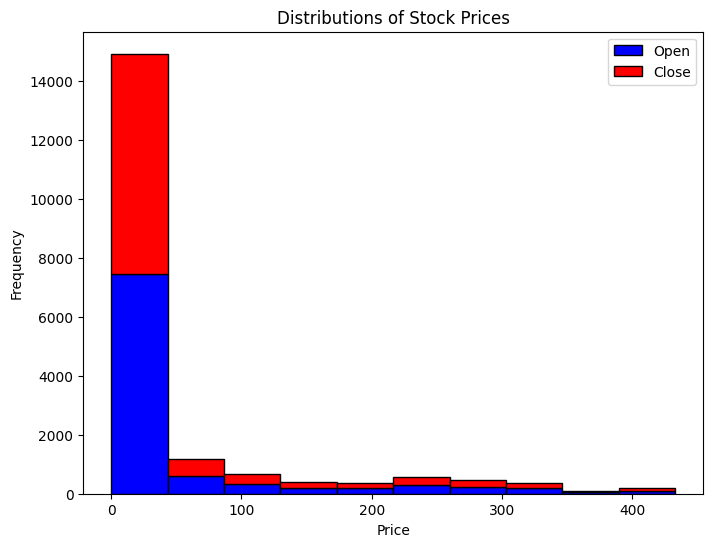

In [219]:
open_prices = prices_history["Open"]
close_prices = prices_history["Close"]

plt.figure(figsize=(8, 6))
plt.hist([open_prices, close_prices], stacked=True, color=["blue", "red"], edgecolor='black')
plt.title("Distributions of Stock Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend(["Open", "Close"])

plt.show()

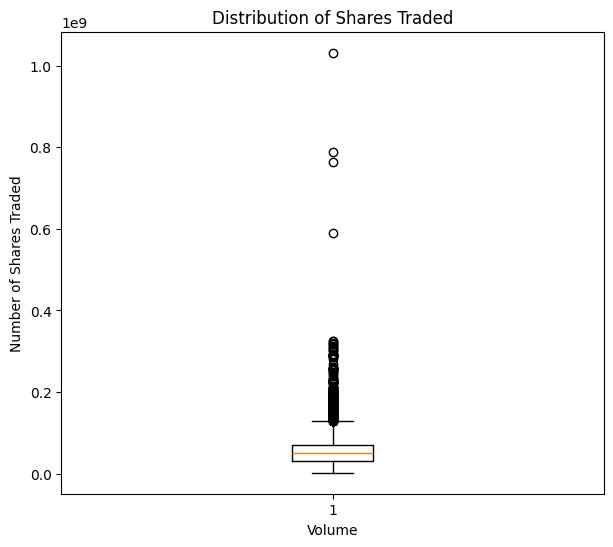

In [220]:
volume = prices_history["Volume"]

plt.rc('figure', figsize=(7, 6))
plt.boxplot(volume)
plt.title("Distribution of Shares Traded")
plt.xlabel("Volume")
plt.ylabel("Number of Shares Traded")

plt.show()

### Visualisation of Historic Stock Prices 

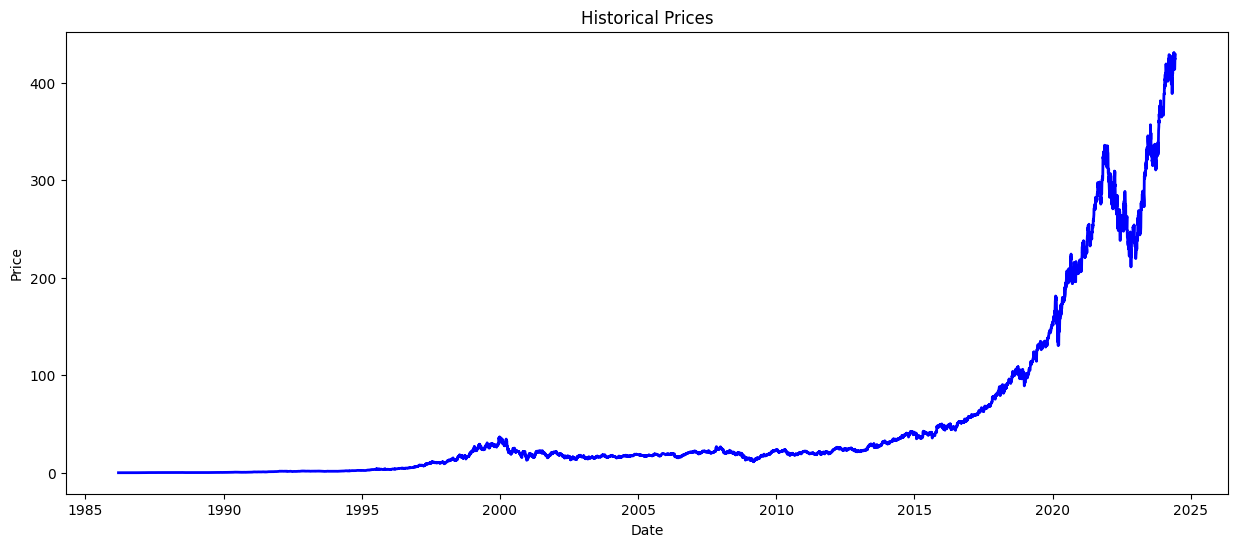

In [221]:
close_prices = prices_history["Close"]
date = prices_history.index.values

plt.rc('figure', figsize=(15, 6))
plt.plot(date, close_prices, color="blue", linewidth=2, label="Price")
plt.title("Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

## Fundamental Analysis

In [222]:
all_info = company.info
all_info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

### Ratios

In [223]:
ratios_names = [("trailingPE", "Price Earnings Ratio"), ("dividendYield", "Dividend Yield"), ("payoutRatio", "Payout Ratio"), ("trailingEps", "Earning Per Share"), ("returnOnAssets", "Return on Assets"), ("returnOnEquity", "Return on Equity"), ("marketCap", "Market Cap"), ("operatingCashflow", "Operating Cash Flow")]

for ratio in ratios_names:
    value = all_info[ratio[0]]
    print(f"{ratio[1]}: {value}")

Price Earnings Ratio: 37.060543
Dividend Yield: 0.0069999998
Payout Ratio: 0.24780001
Earning Per Share: 11.56
Return on Assets: 0.1541
Return on Equity: 0.38487998
Market Cap: 3184149397504
Operating Cash Flow: 110122999808


### Balance Sheet

In [224]:
balance_sheet = company.balance_sheet
balance_sheet.head(10)

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
Invested Capital,253460000000.0,216323000000.0,200134000000.0,181631000000.0
Working Capital,80108000000.0,74602000000.0,95749000000.0,109605000000.0
Net Tangible Assets,128971000000.0,87720000000.0,84477000000.0,67915000000.0
Capital Lease Obligations,12728000000.0,11489000000.0,9629000000.0,7671000000.0
Common Stock Equity,206223000000.0,166542000000.0,141988000000.0,118304000000.0


In [225]:
fields = ["Current Assets", "Current Liabilities", "Total Assets", "Total Liabilities Net Minority Interest", "Total Capitalization", "Working Capital", "Invested Capital", "Total Debt", "Net Debt", "Stockholders Equity"]

df_balance = balance_sheet.loc[fields, :]
df_balance.loc["Debt to Equity"] = (df_balance.loc["Total Liabilities Net Minority Interest"] / df_balance.loc["Stockholders Equity"])
df_balance.loc["Current Ratio"] = (df_balance.loc["Current Assets"] / df_balance.loc["Current Liabilities"])
df_balance

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Current Assets,184257000000.0,169684000000.0,184406000000.0,181915000000.0
Current Liabilities,104149000000.0,95082000000.0,88657000000.0,72310000000.0
Total Assets,411976000000.0,364840000000.0,333779000000.0,301311000000.0
Total Liabilities Net Minority Interest,205753000000.0,198298000000.0,191791000000.0,183007000000.0
Total Capitalization,248213000000.0,213574000000.0,192062000000.0,177882000000.0
Working Capital,80108000000.0,74602000000.0,95749000000.0,109605000000.0
Invested Capital,253460000000.0,216323000000.0,200134000000.0,181631000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Stockholders Equity,206223000000.0,166542000000.0,141988000000.0,118304000000.0


In [226]:
df_balance = df_balance.transpose()
df_balance = df_balance.rename(columns={"Total Liabilities Net Minority Interest": "Total Liabilities"})
df_balance = df_balance.sort_index()
df_balance

,Current Assets,Current Liabilities,Total Assets,Total Liabilities,Total Capitalization,Working Capital,Invested Capital,Total Debt,Net Debt,Stockholders Equity,Debt to Equity,Current Ratio
2020-06-30,181915000000.0,72310000000.0,301311000000.0,183007000000.0,177882000000.0,109605000000.0,181631000000.0,70998000000.0,49751000000.0,118304000000.0,1.546921,2.515765
2021-06-30,184406000000.0,88657000000.0,333779000000.0,191791000000.0,192062000000.0,95749000000.0,200134000000.0,67775000000.0,43922000000.0,141988000000.0,1.350755,2.079994
2022-06-30,169684000000.0,95082000000.0,364840000000.0,198298000000.0,213574000000.0,74602000000.0,216323000000.0,61270000000.0,35850000000.0,166542000000.0,1.190679,1.784607
2023-06-30,184257000000.0,104149000000.0,411976000000.0,205753000000.0,248213000000.0,80108000000.0,253460000000.0,59965000000.0,12533000000.0,206223000000.0,0.997721,1.769167


### Assets and Liabilities Plot

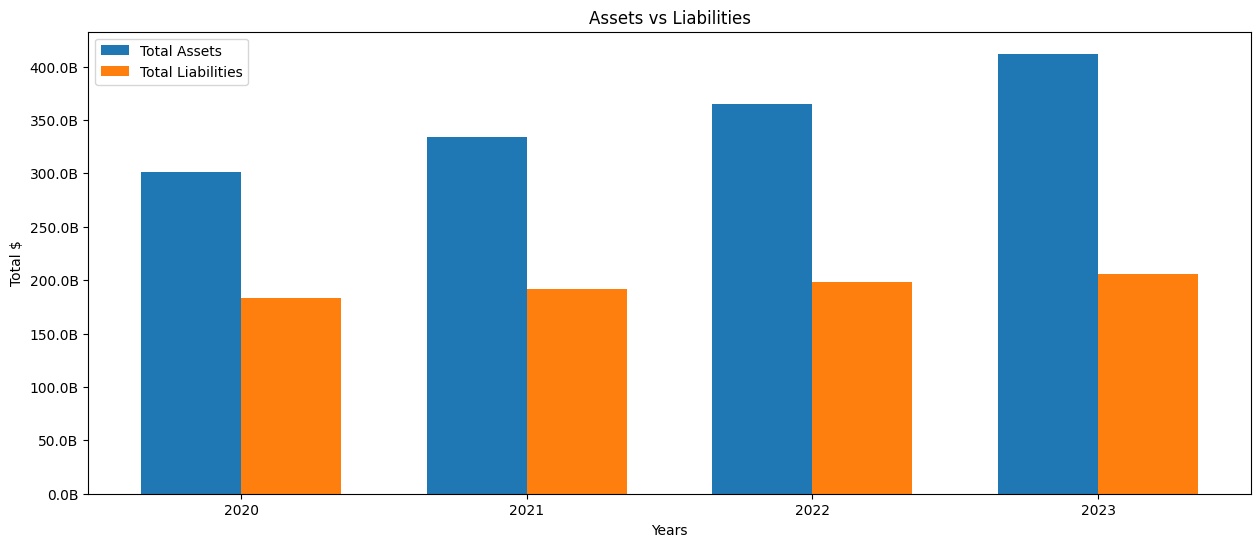

In [227]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_group_1 = {
    "label": "Assets",
    "values": df_balance["Total Assets"].values
}
y_group_2 = {
    "label": "Liabilities",
    "values": df_balance["Total Liabilities"].values
}
settings = {
    "title": "Assets vs Liabilities",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["Total Assets", "Total Liabilities"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

### Debt Plot

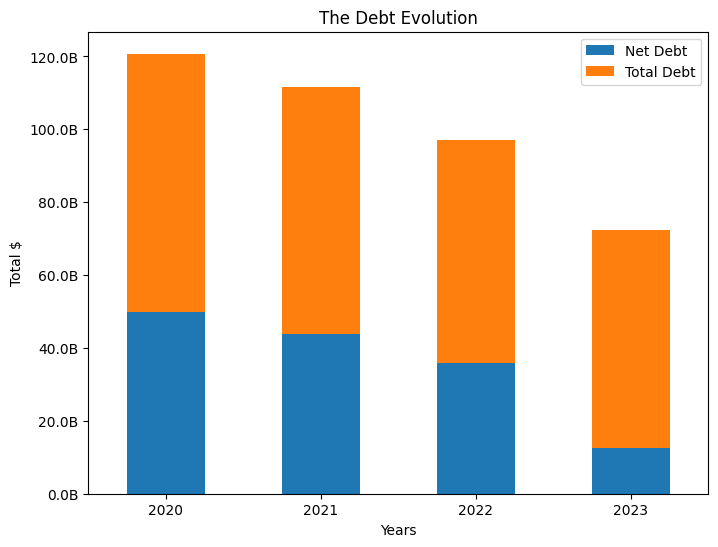

In [228]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_balance.loc[:, ["Net Debt", "Total Debt"]]
settings = {
    "title": "The Debt Evolution",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True,
}
display_stacked_bar_plot(x_group, x_values, y_values, settings)

### Liquidity and Efficiency Plot

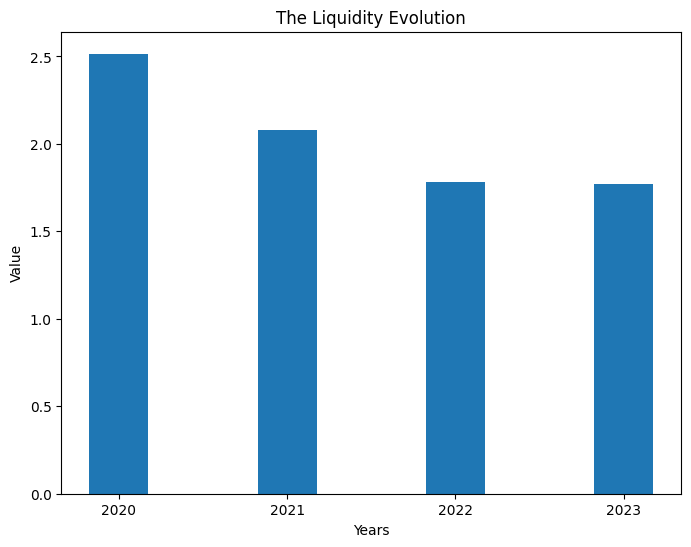

In [229]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_balance["Current Ratio"].values
settings = {
    "title": "The Liquidity Evolution",
    "xlabel": "Years",
    "ylabel": "Value",
    "is_y_axis_formatted": False
}

display_bar_plot(x_group, x_values, y_values, settings)

### Investment and Financing Plots

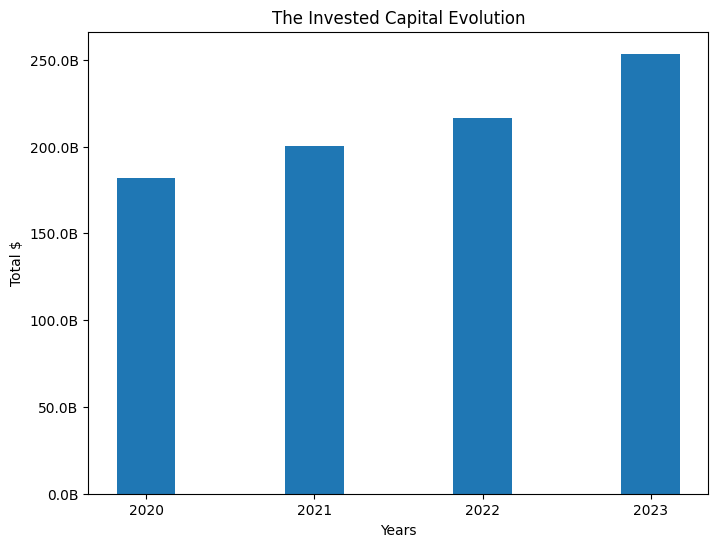

In [230]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_balance["Invested Capital"].values
settings = {
    "title": "The Invested Capital Evolution",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True
}

display_bar_plot(x_group, x_values, y_values, settings)

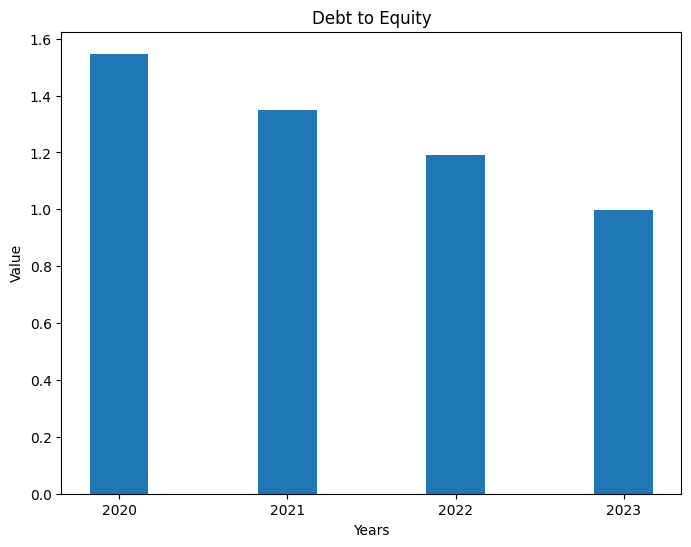

In [231]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_balance["Debt to Equity"].values
settings = {
    "title": "Debt to Equity",
    "xlabel": "Years",
    "ylabel": "Value",
    "is_y_axis_formatted": False
}

display_bar_plot(x_group, x_values, y_values, settings)

### Income Statement

In [232]:
income_statement = company.income_stmt
income_statement

,2023-06-30,2022-06-30,2021-06-30,2020-06-30,2019-06-30
Tax Effect Of Unusual Items,-2850000.0,43420000.0,180160797.164637,4760000.0,NaN
Tax Rate For Calcs,0.19,0.13,0.138266,0.17,NaN
Normalized EBITDA,105155000000.0,99905000000.0,83831000000.0,68395000000.0,NaN
Total Unusual Items,-15000000.0,334000000.0,1303000000.0,28000000.0,NaN
Total Unusual Items Excluding Goodwill,-15000000.0,334000000.0,1303000000.0,28000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,72361000000.0,72738000000.0,61271000000.0,44281000000.0,NaN
Reconciled Depreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0,NaN
Reconciled Cost Of Revenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0,NaN
EBITDA,105140000000.0,100239000000.0,85134000000.0,68423000000.0,NaN
EBIT,91279000000.0,85779000000.0,73448000000.0,55627000000.0,NaN


In [233]:
fields = ["Total Revenue", "Cost Of Revenue", "Gross Profit", "Operating Expense", "Operating Income", "Total Expenses", "Net Income From Continuing Operation Net Minority Interest", "EBIT", "EBITDA", "General And Administrative Expense",  "Selling And Marketing Expense", "Research And Development"]
dates = ["2023-06-30", "2022-06-30", "2021-06-30", "2020-06-30"]

df_income_stmt = income_statement.loc[fields, dates]
df_income_stmt

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Total Revenue,211915000000.0,198270000000.0,168088000000.0,143015000000.0
Cost Of Revenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0
Gross Profit,146052000000.0,135620000000.0,115856000000.0,96937000000.0
Operating Expense,57529000000.0,52237000000.0,45940000000.0,43978000000.0
Operating Income,88523000000.0,83383000000.0,69916000000.0,52959000000.0
Total Expenses,123392000000.0,114887000000.0,98172000000.0,90056000000.0
Net Income From Continuing Operation Net Minority Interest,72361000000.0,72738000000.0,61271000000.0,44281000000.0
EBIT,91279000000.0,85779000000.0,73448000000.0,55627000000.0
EBITDA,105140000000.0,100239000000.0,85134000000.0,68423000000.0
General And Administrative Expense,7575000000.0,5900000000.0,5107000000.0,5111000000.0


In [234]:
df_income_stmt = df_income_stmt.transpose()
df_income_stmt = df_income_stmt.rename(columns={"Net Income From Continuing Operation Net Minority Interest": "Net Income", "General And Administrative Expense": "Administrative Expense", "Selling And Marketing Expense": "Marketing Expense", "Research And Development": "Research Expense"})
df_income_stmt = df_income_stmt.sort_index()
df_income_stmt

,Total Revenue,Cost Of Revenue,Gross Profit,Operating Expense,Operating Income,Total Expenses,Net Income,EBIT,EBITDA,Administrative Expense,Marketing Expense,Research Expense
2020-06-30,143015000000.0,46078000000.0,96937000000.0,43978000000.0,52959000000.0,90056000000.0,44281000000.0,55627000000.0,68423000000.0,5111000000.0,19598000000.0,19269000000.0
2021-06-30,168088000000.0,52232000000.0,115856000000.0,45940000000.0,69916000000.0,98172000000.0,61271000000.0,73448000000.0,85134000000.0,5107000000.0,20117000000.0,20716000000.0
2022-06-30,198270000000.0,62650000000.0,135620000000.0,52237000000.0,83383000000.0,114887000000.0,72738000000.0,85779000000.0,100239000000.0,5900000000.0,21825000000.0,24512000000.0
2023-06-30,211915000000.0,65863000000.0,146052000000.0,57529000000.0,88523000000.0,123392000000.0,72361000000.0,91279000000.0,105140000000.0,7575000000.0,22759000000.0,27195000000.0


### Revenue and Profit Charts

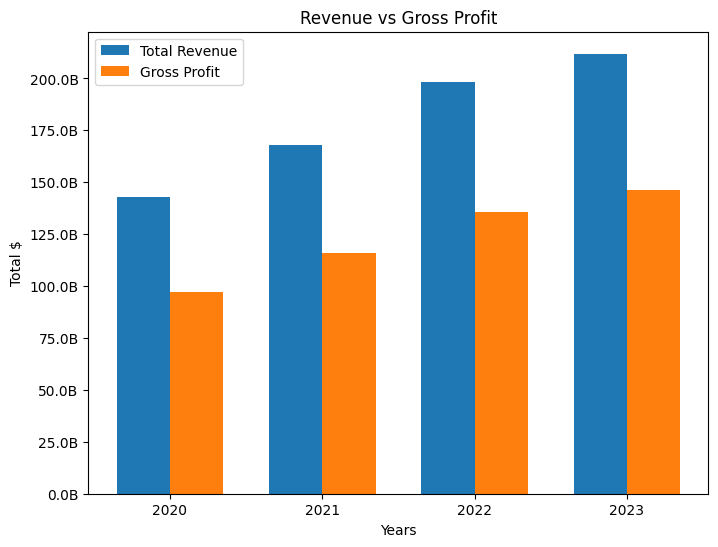

In [235]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_group_1 = {
    "label": "Revenue",
    "values": df_income_stmt["Total Revenue"].values
}
y_group_2 = {
    "label": "Gross Profit",
    "values": df_income_stmt["Gross Profit"].values
}
settings = {
    "title": "Revenue vs Gross Profit",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["Total Revenue", "Gross Profit"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

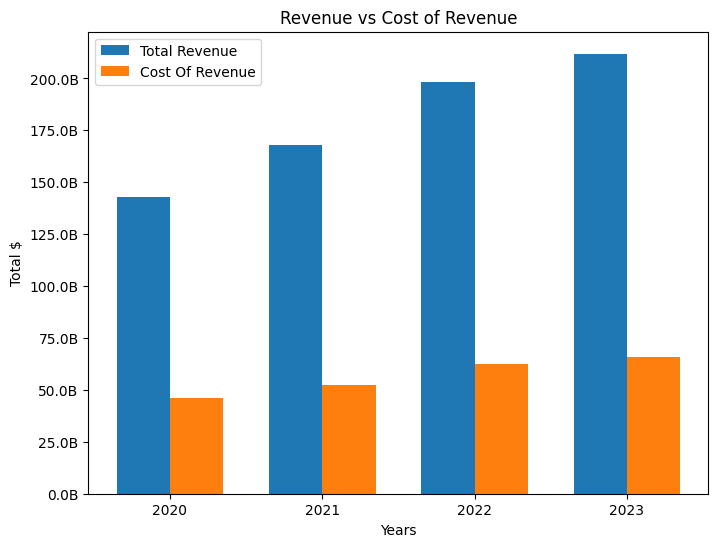

In [236]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_group_1 = {
    "label": "Revenue",
    "values": df_income_stmt["Total Revenue"].values
}
y_group_2 = {
    "label": "Costs of Revenue",
    "values": df_income_stmt["Cost Of Revenue"].values
}
settings = {
    "title": "Revenue vs Cost of Revenue",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["Total Revenue", "Cost Of Revenue"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

### Expenses Breakdown

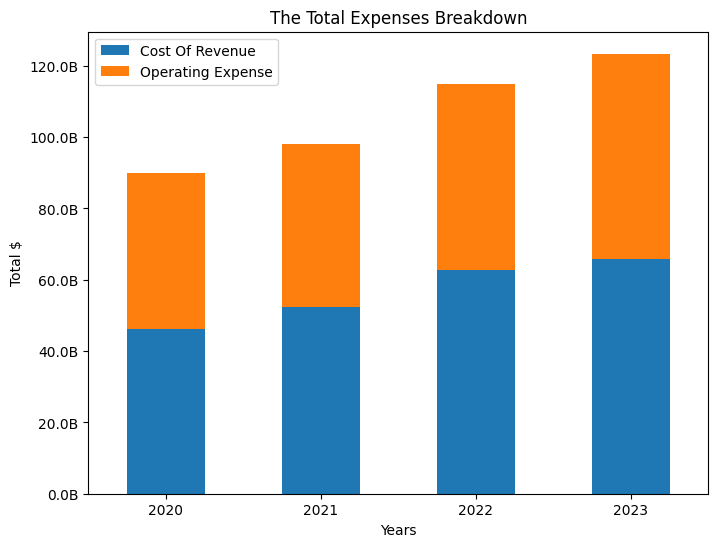

In [237]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_values = df_income_stmt.loc[:, ["Cost Of Revenue", "Operating Expense"]]
settings = {
    "title": "The Total Expenses Breakdown",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True,
}
display_stacked_bar_plot(x_group, x_values, y_values, settings)

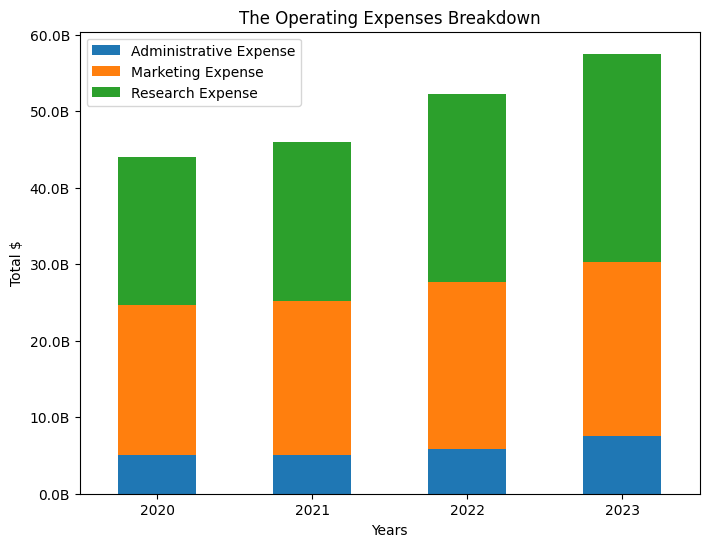

In [238]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_values = df_income_stmt.loc[:, ["Administrative Expense", "Marketing Expense", "Research Expense"]]
settings = {
    "title": "The Operating Expenses Breakdown",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True,
}
display_stacked_bar_plot(x_group, x_values, y_values, settings)

### Income

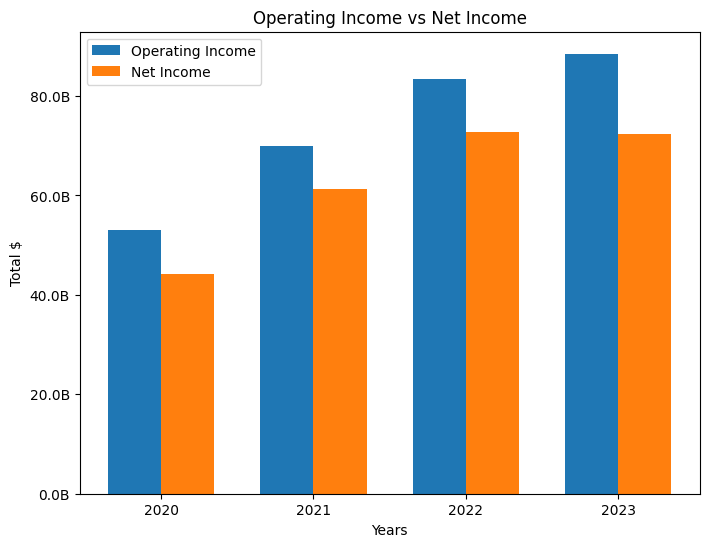

In [239]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_group_1 = {
    "label": "Operating Income",
    "values": df_income_stmt["Operating Income"].values
}
y_group_2 = {
    "label": "Net Income",
    "values": df_income_stmt["Net Income"].values
}
settings = {
    "title": "Operating Income vs Net Income",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["Operating Income", "Net Income"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

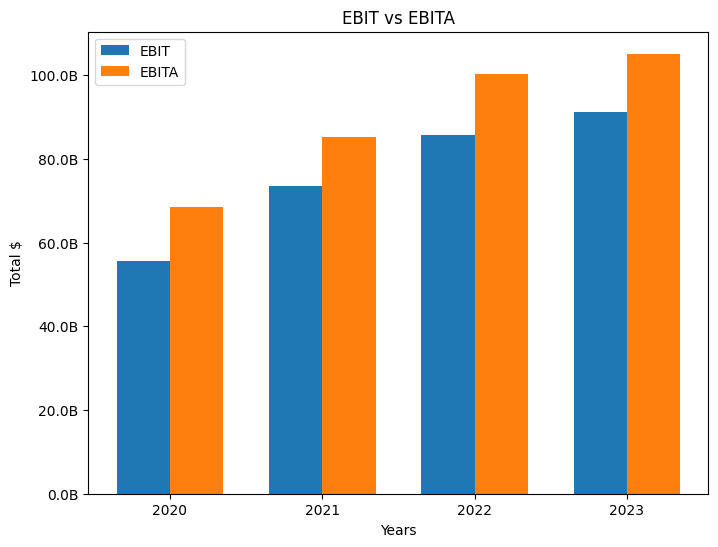

In [240]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_group_1 = {
    "label": "EBIT",
    "values": df_income_stmt["EBIT"].values
}
y_group_2 = {
    "label": "EBITA",
    "values": df_income_stmt["EBITDA"].values
}
settings = {
    "title": "EBIT vs EBITA",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["EBIT", "EBITA"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

### Cash Flow

In [241]:
cashflow = company.cash_flow
cashflow

,2023-06-30,2022-06-30,2021-06-30,2020-06-30,2019-06-30
Free Cash Flow,59475000000.0,65149000000.0,56118000000.0,45234000000.0,NaN
Repurchase Of Capital Stock,-22245000000.0,-32696000000.0,-27385000000.0,-22968000000.0,NaN
Repayment Of Debt,-2750000000.0,-9023000000.0,-3750000000.0,-5518000000.0,NaN
Issuance Of Debt,NaN,NaN,NaN,0.0,0.0
Issuance Of Capital Stock,1866000000.0,1841000000.0,1693000000.0,1343000000.0,NaN
Capital Expenditure,-28107000000.0,-23886000000.0,-20622000000.0,-15441000000.0,NaN
End Cash Position,34704000000.0,13931000000.0,14224000000.0,13576000000.0,NaN
Beginning Cash Position,13931000000.0,14224000000.0,13576000000.0,11356000000.0,NaN
Effect Of Exchange Rate Changes,-194000000.0,-141000000.0,-29000000.0,-201000000.0,NaN
Changes In Cash,20967000000.0,-152000000.0,677000000.0,2421000000.0,NaN


In [242]:
fields = ["Operating Cash Flow", "Capital Expenditure", "Free Cash Flow"]
dates = ["2023-06-30", "2022-06-30", "2021-06-30", "2020-06-30"]

df_cashflow = cashflow.loc[fields, dates]
df_cashflow

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Operating Cash Flow,87582000000.0,89035000000.0,76740000000.0,60675000000.0
Capital Expenditure,-28107000000.0,-23886000000.0,-20622000000.0,-15441000000.0
Free Cash Flow,59475000000.0,65149000000.0,56118000000.0,45234000000.0
